In [1]:
#Read SLA files and subsample the Gulf Stream region - July 2021
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
from gsw import sigma0

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()

'/home1/datahome/epauthen'

In [ ]:
path = '/home/ref-cmems-public/tac/sea-level/SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047/dataset-duacs-rep-global-merged-allsat-phy-l4/'
for yy in range(1993,2020):
    ds = xr.open_mfdataset(path + str(yy) + '/**/*.nc', combine='nested', concat_dim='time')
    dsub = ds.where((ds.longitude<=-25+360) & (ds.longitude>=-85+360) & (ds.latitude<=55) & (ds.latitude>=18), drop=True)
    dsub.to_netcdf('/home/datawork-lops-bluecloud/osnet/data_remote_sensing/SLA/SLA_Gulf_Stream/SLA_Gulf_Stream_' + str(yy) + '.nc')
    print(yy)


1993
1994
1995
1996
1997
1998


In [3]:
#Load back and test
path = '/home/ref-cmems-public/tac/sea-level/SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047/dataset-duacs-rep-global-merged-allsat-phy-l4/'
yy = 2010
ds = xr.open_mfdataset(path + str(yy) + '/**/*.nc', combine='nested', concat_dim='time')
dsub = ds.where((ds.longitude<=-25+360) & (ds.longitude>=-85+360) & (ds.latitude<=55) & (ds.latitude>=18), drop=True)

dsub

,Array,Chunk
Bytes,98.91 MiB,277.50 kiB
Shape,"(365, 148, 2, 240)","(1, 148, 2, 240)"
Count,2556 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,98.91 MiB,277.50 kiB
Shape,"(365, 240, 2, 148)","(1, 240, 2, 148)"
Count,2556 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


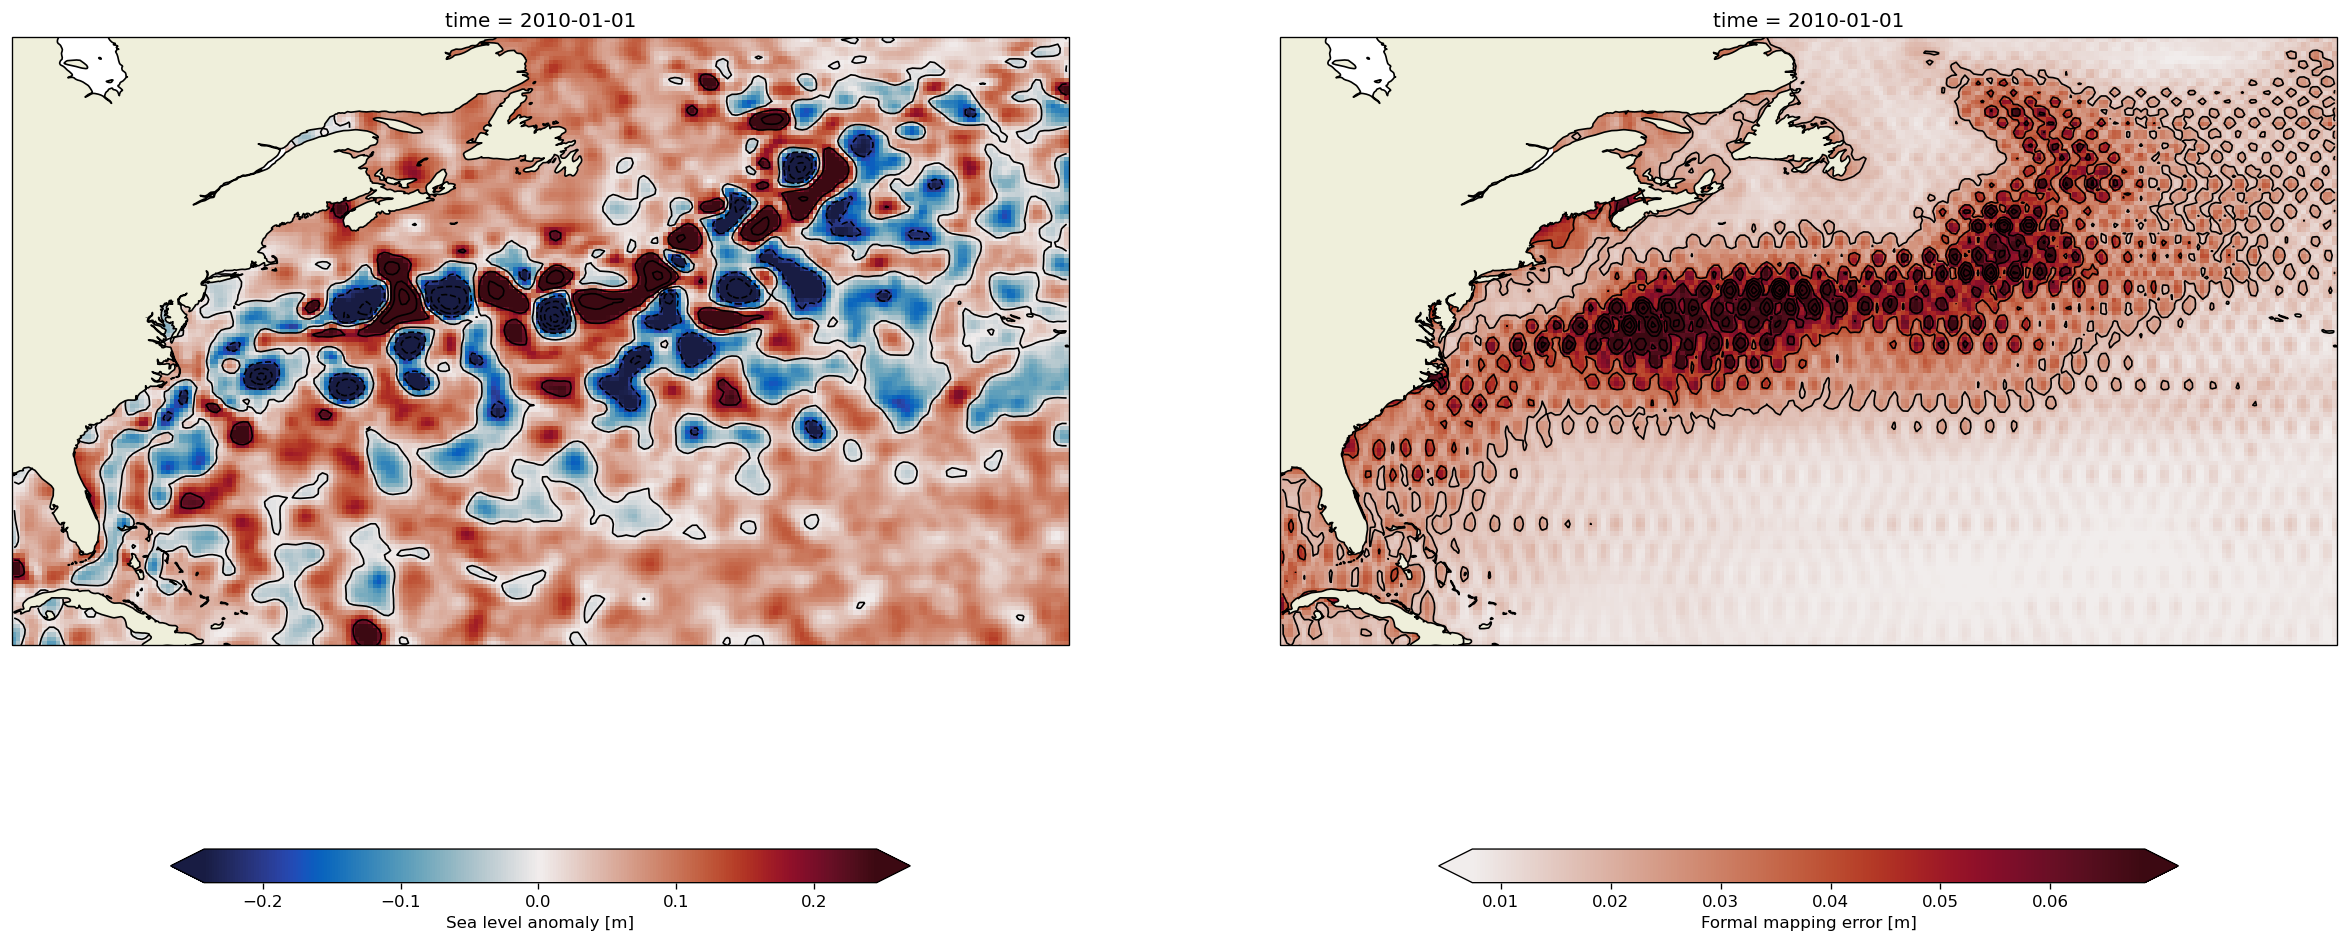

In [5]:
#Verif Maps
proj=ccrs.PlateCarree()
land_feature = cfeature.NaturalEarthFeature(
    category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
extent = np.array([-85, -25, 20, 51])
subplot_kw = {'projection': proj, 'extent': extent}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 15), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
dsub['sla'].isel(time=0).plot(ax=ax[0],
                  cmap=cmocean.cm.balance,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[0].contour(dsub['longitude'],dsub['latitude'],dsub['sla'].isel(time=0),colors = "black",linewidths = 1)
ax[0].add_feature(land_feature, edgecolor='black')

dsub['err'].isel(time=0).plot(ax=ax[1],
                  cmap=cmocean.cm.amp,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[1].contour(dsub['longitude'],dsub['latitude'],dsub['err'].isel(time=0),colors = "black",linewidths = 1)
ax[1].add_feature(land_feature, edgecolor='black')
plt.show()

/Users/epauthenet/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/epauthenet/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


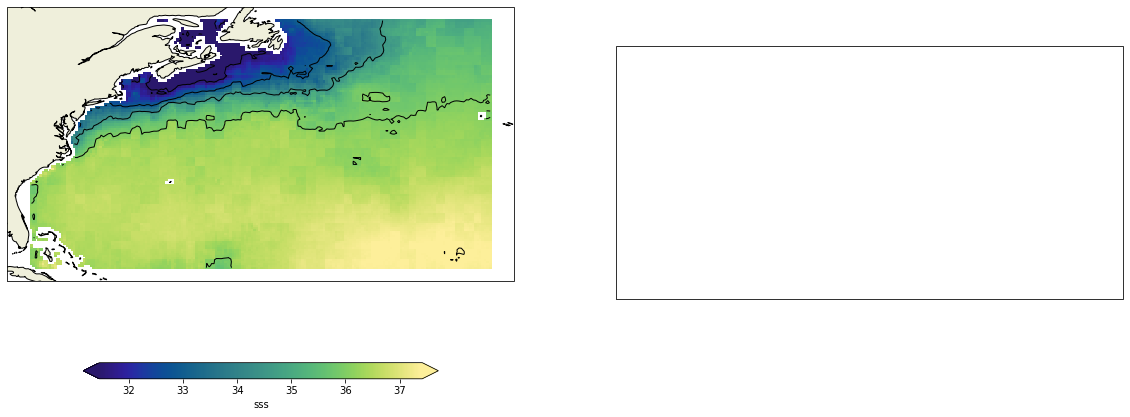

In [88]:
#Monthly mean plot
#Global mean
dsm = ds.mean(dim = ['time'])
#sss
dsub = dsm.where((dsm.lon<=-30) & (dsm.lon>=-80) & (dsm.lat<=50) & (dsm.lat>=23), drop=True)

land_feature = cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection=ccrs.PlateCarree()),figsize = (20,10)) 
dsub['sss'].plot(ax=ax[0],
                  cmap=cmocean.cm.haline,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[0].add_feature(land_feature, edgecolor='black')
ax[0].contour(dsub['lon'],dsub['lat'],dsub['sss'],colors = "black",linewidths = 1)
